In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Northbound.csv')
df['Timestamps'] = df['Group Starts']

df['Group Starts'] = ['01-Jan','02-Feb','03-Mar','04-Apr','05-May','06-Jun',
                      '07-Jul','08-Aug','09-Sep','10-Oct','11-Nov','12-Dec']
df.head()

,Group Starts,Sum - Volume (Lynden/Aldergrove),Avg - Delay (Lynden/Aldergrove),Avg - Service Rate (Lynden/Aldergrove),Avg - Vehicles In Queue (Lynden/Aldergrove),Avg - Queue Length (Lynden/Aldergrove),Timestamps
0,01-Jan,50701,11.6,91.7,15.0,115.4,2015-01-01 00:00:00
1,02-Feb,43244,9.9,92.7,16.7,128.8,2015-02-01 00:00:00
2,03-Mar,40917,12.1,95.5,20.9,161.2,2015-03-01 00:00:00
3,04-Apr,41585,7.6,96.5,13.7,105.5,2015-04-01 00:00:00
4,05-May,40405,12.0,98.7,21.3,164.1,2015-05-01 00:00:00


## Way 1

/home/eli/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



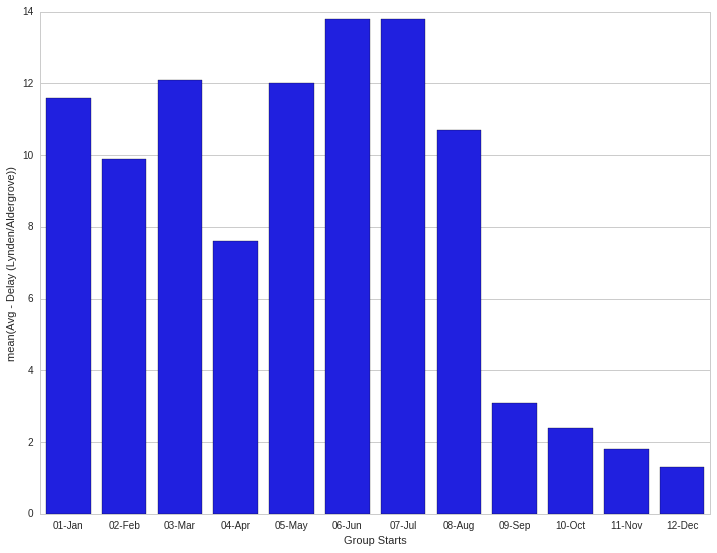

In [10]:
import seaborn as sns
%matplotlib inline 

from ipywidgets import widgets
from IPython.display import display

columns = df.columns.tolist()

selection = widgets.Dropdown(description="Which column should be graphed?")
selection.options = columns
display(selection)

def on_button_clicked(b):
    sns.set_style("whitegrid")
    sns.set_context(rc={"figure.figsize": (12, 9)})
    sns.barplot(x='Group Starts', y=selection.value, data=df, color='Blue')


button = widgets.Button(description="Make graph")
display(button)

button.on_click(on_button_clicked)

## Way 2

In [8]:
import plotly.plotly as py
py.sign_in('captain_eli', '*****')
from plotly.graph_objs import Bar

In [9]:
py.iplot([Bar(x=df['Group Starts'], y=df['Avg - Delay (Lynden/Aldergrove)'])])

## Way 3

In [3]:
from pivottablejs import pivot_ui
pivot_ui(df)